In [6]:
#importing necessary modules
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
import os

In [7]:
#reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing.shape

(1460, 81)

In [9]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
#identifying the null values in the columns
((housing.isnull().sum()/housing.shape[0])*100).round(2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [12]:
#cleaning the dataset

#dropping any duplicate values in the dataset
housing = housing.drop_duplicates()
housing.shape

(1460, 81)

In [13]:
#imputing missing values of LotFrontage with its mean value
housing['LotFrontage'].fillna((housing['LotFrontage'].mean()), inplace = True)

In [14]:
housing['Alley'].value_counts()
#here we can see that the missing values are of the no alley access kind, hence we must impute no alley access where there are nan values

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
housing['BsmtFinType1'].value_counts()
#here we can see that the missing values are of the no basement kind, hence we must impute no basement where there are nan values

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [16]:
housing['GarageFinish'].value_counts()
#here we can see that the missing values are of the no garage kind, hence we must impute no garage where there are nan values

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [17]:
#similarly we see that in many feilds where nan represents the not available from the data dictionary, 
# hence we impute appropriate values for each column

housing['Alley'].fillna('no_alley_access', inplace=True)

In [18]:
for column in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing[column].fillna('no_basement', inplace=True)

In [19]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing[column].fillna('no_garage', inplace=True)

In [20]:
housing['FireplaceQu'].fillna('no_fireplace', inplace=True)
housing['PoolQC'].fillna('no_pool', inplace=True)
housing['Fence'].fillna('no_fence', inplace=True)
housing['MiscFeature'].fillna('none', inplace=True)

In [21]:
((housing.isnull().sum()/housing.shape[0])*100).round(2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [22]:
# Dropping rows with missing values, as they are of very less quantity, it wont affect our analysis
housing.dropna(axis='rows', inplace=True)

In [23]:
((housing.isnull().sum()/housing.shape[0])*100).round(2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

In [24]:
#imputing age instead of using year directly
import datetime
today = str(datetime.date.today())
current_year = int(today[:4])

housing['YearBuilt'] = current_year - housing.YearBuilt
housing['YearRemodAdd'] = current_year - housing.YearRemodAdd
housing['GarageYrBlt'] = current_year - housing.GarageYrBlt
housing['YrSold'] = current_year - housing.YrSold

housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].head(10)


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,17,17,17.0,12
1,44,44,44.0,13
2,19,18,19.0,12
3,105,50,22.0,14
4,20,20,20.0,12
5,27,25,27.0,11
6,16,15,16.0,13
7,47,47,47.0,11
8,89,70,89.0,12
9,81,70,81.0,12


In [25]:
housing.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1370.00000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,...,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,730.69635,56.054745,70.551452,10687.435036,6.181752,5.582482,47.216058,34.672993,109.076642,454.211679,...,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,12.188321,185194.797080
std,421.19485,41.073531,21.950456,10228.507006,1.344236,1.081480,29.371056,20.452934,184.589326,458.985739,...,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,1.331589,78899.705642
min,1.00000,20.000000,21.000000,1300.000000,2.000000,2.000000,10.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,35311.000000
25%,365.25000,20.000000,60.000000,7731.000000,5.000000,5.000000,19.000000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.000000,133925.000000
50%,732.50000,50.000000,70.049958,9591.000000,6.000000,5.000000,45.000000,26.000000,0.000000,399.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.000000,167000.000000
75%,1093.75000,70.000000,79.000000,11712.750000,7.000000,6.000000,65.000000,52.750000,171.750000,728.000000,...,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,13.000000,217875.000000
90%,1313.10000,120.000000,92.000000,14573.300000,8.000000,7.000000,94.000000,70.000000,340.000000,1074.400000,...,264.000000,130.000000,108.000000,0.000000,0.000000,0.000000,0.000000,10.000000,14.000000,281383.900000
95%,1387.55000,160.000000,104.000000,17501.650000,8.000000,8.000000,100.550000,70.000000,461.750000,1275.650000,...,341.100000,171.100000,180.000000,0.000000,166.650000,0.000000,0.000000,11.000000,14.000000,334175.600000
99%,1443.31000,190.000000,134.930000,39410.900000,10.000000,9.000000,120.000000,70.000000,802.200000,1583.230000,...,509.620000,282.930000,260.550000,168.000000,271.620000,0.000000,700.000000,12.000000,14.000000,441940.910000


In [26]:
#treating outliers using IQR (interquartile range) method
numeric = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','SalePrice']
def remove_outliers(temp):
    for column in numeric:
        Q1=temp[column].quantile(.25)
        Q3=temp[column].quantile(.99)
        IQR=Q3-Q1
        temp=temp[(temp[column]>=(Q1-(1.5*IQR)))&(temp[column]<=(Q3+(1.5*IQR)))] 
    return temp
housing = remove_outliers(housing)

In [27]:
housing['Utilities'].value_counts()

AllPub    1356
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
housing['PoolArea'].value_counts()

0      1352
738       1
648       1
576       1
555       1
512       1
Name: PoolArea, dtype: int64

In [29]:
housing['3SsnPorch'].value_counts()

0      1334
168       3
216       2
144       2
180       2
238       1
245       1
196       1
182       1
320       1
290       1
162       1
153       1
304       1
140       1
130       1
96        1
23        1
407       1
Name: 3SsnPorch, dtype: int64

In [30]:
housing['MiscVal'].value_counts()

0       1317
400       10
500        7
700        4
600        4
450        3
1200       2
480        2
1400       1
1300       1
1150       1
800        1
620        1
560        1
350        1
54         1
Name: MiscVal, dtype: int64

In [31]:
#dropping these columns as they dont show much variance, hence dont add much value to the analysis
housing.drop(['Utilities','PoolArea','3SsnPorch','MiscVal','Id'],axis = 1,inplace = True)

In [32]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,no_alley_access,Reg,Lvl,Inside,Gtl,...,0,0,no_pool,no_fence,none,2,12,WD,Normal,208500
1,20,RL,80.0,9600,Pave,no_alley_access,Reg,Lvl,FR2,Gtl,...,0,0,no_pool,no_fence,none,5,13,WD,Normal,181500
2,60,RL,68.0,11250,Pave,no_alley_access,IR1,Lvl,Inside,Gtl,...,0,0,no_pool,no_fence,none,9,12,WD,Normal,223500
3,70,RL,60.0,9550,Pave,no_alley_access,IR1,Lvl,Corner,Gtl,...,272,0,no_pool,no_fence,none,2,14,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,no_alley_access,IR1,Lvl,FR2,Gtl,...,0,0,no_pool,no_fence,none,12,12,WD,Normal,250000


In [33]:
categorical=housing.select_dtypes(include = 'object').columns.tolist()
numeric=housing.select_dtypes(include = ['int64','float64']).columns.tolist()
print(categorical)
print(numeric)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'Sc

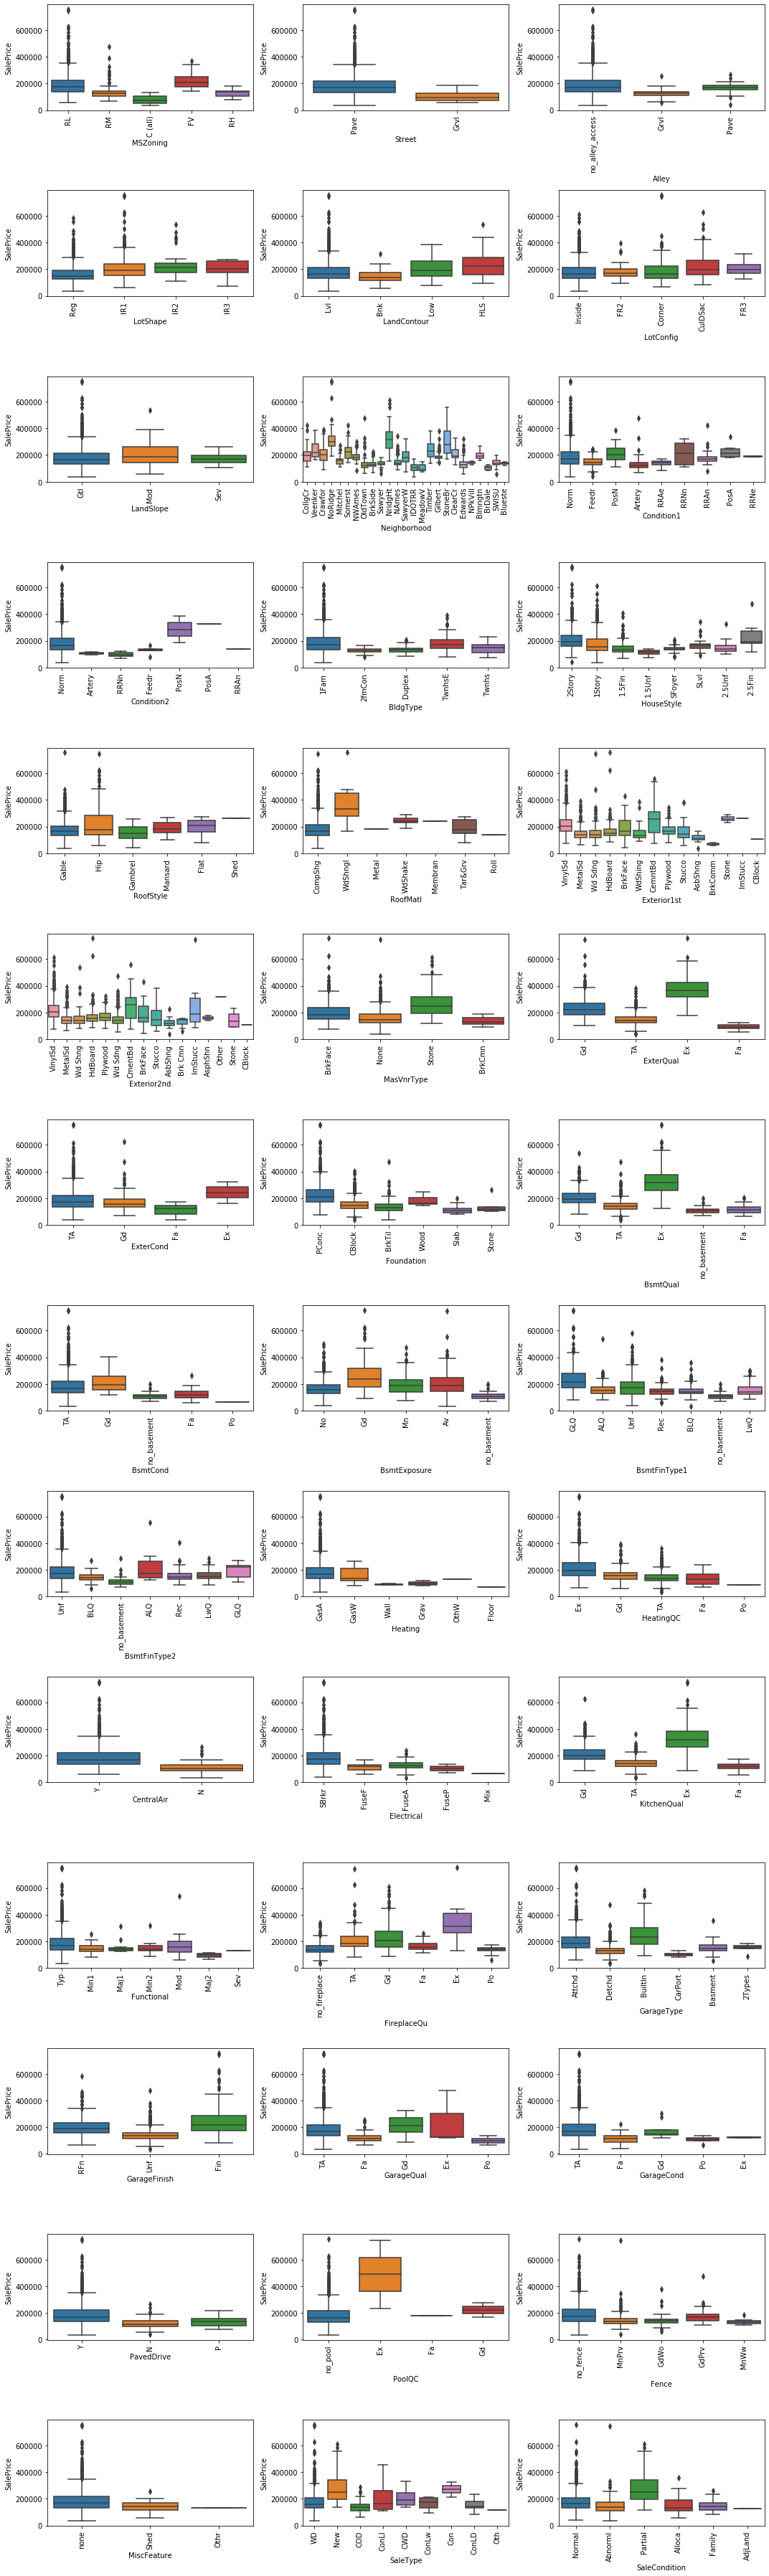

In [34]:
#visualizing categorical variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,50))
i = 1
for col in categorical:
    plt.subplot(len(categorical)//3,3,i)
    sns.boxplot(y='SalePrice',x=col,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

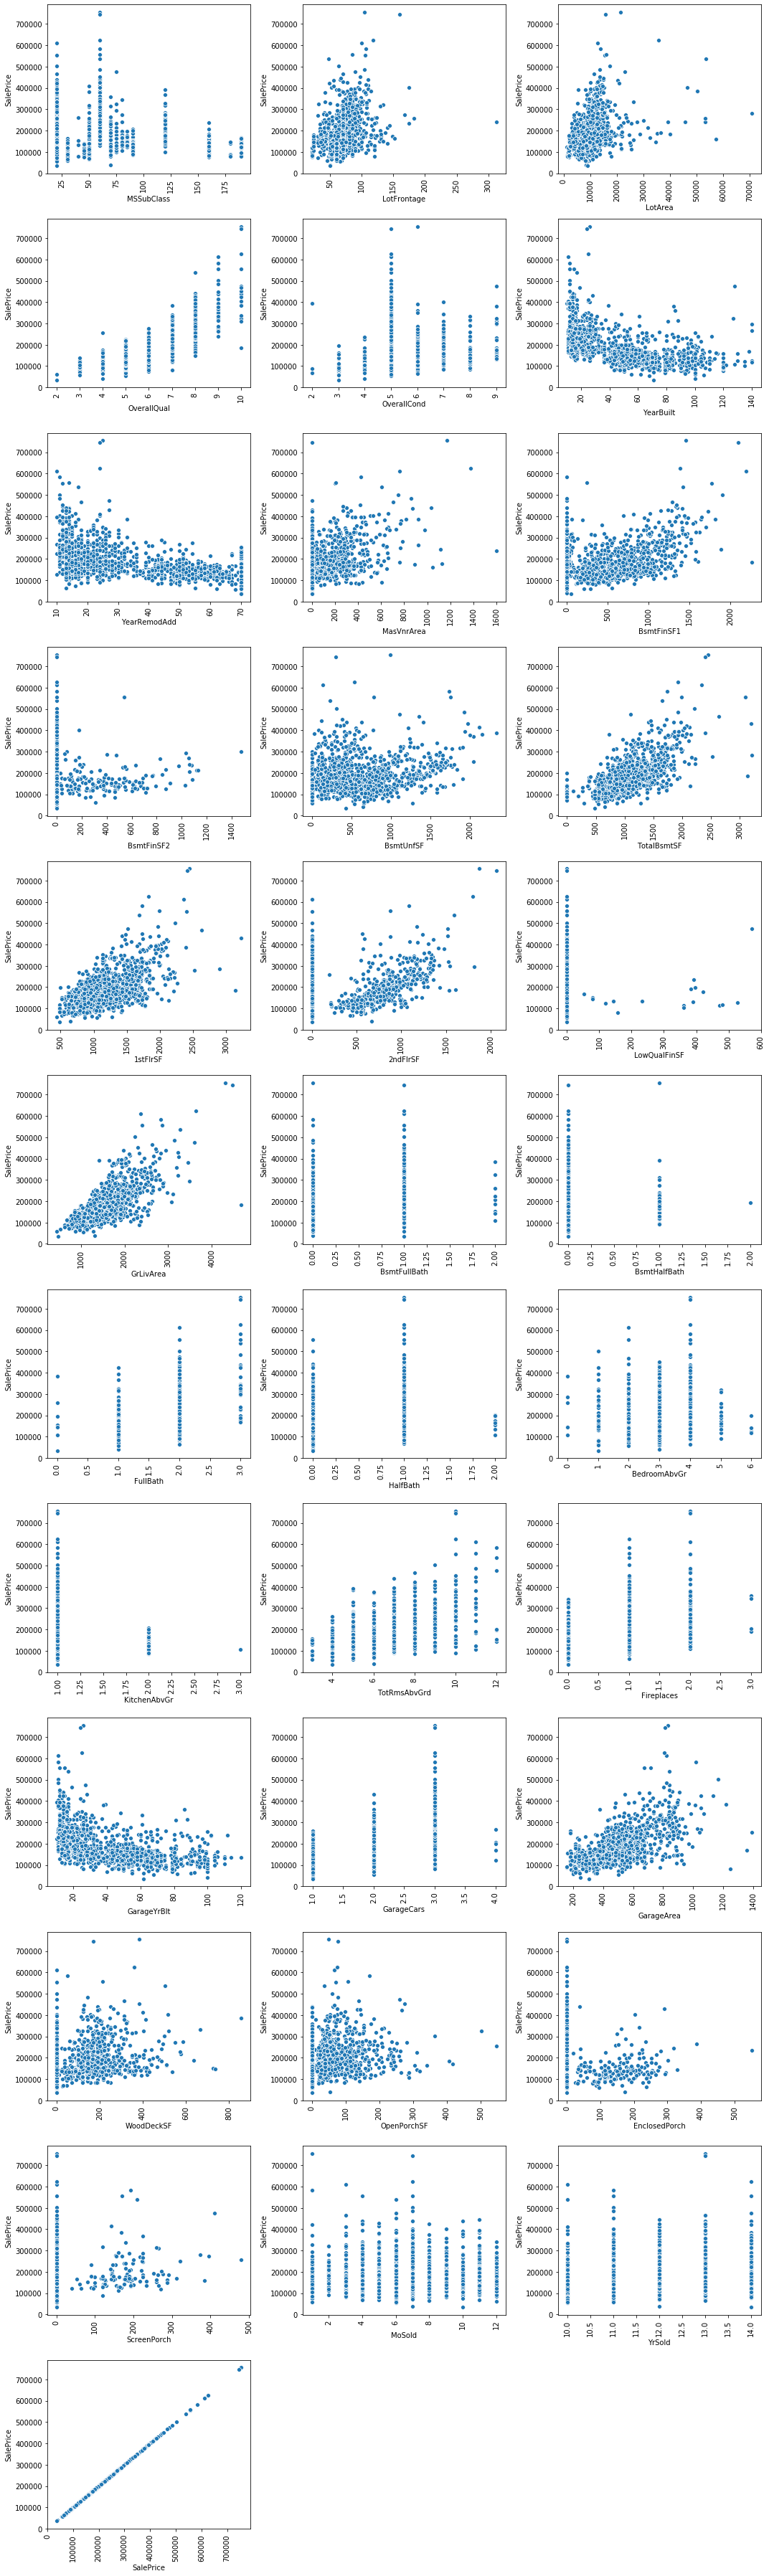

In [35]:
#visualizing numeric variables
plt.figure(figsize = (15,50))
i = 1
for col in numeric:
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=col,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()
#BsmtFinSF1, YearBuilt, TotalbsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea are lineraly related to SalePrice.

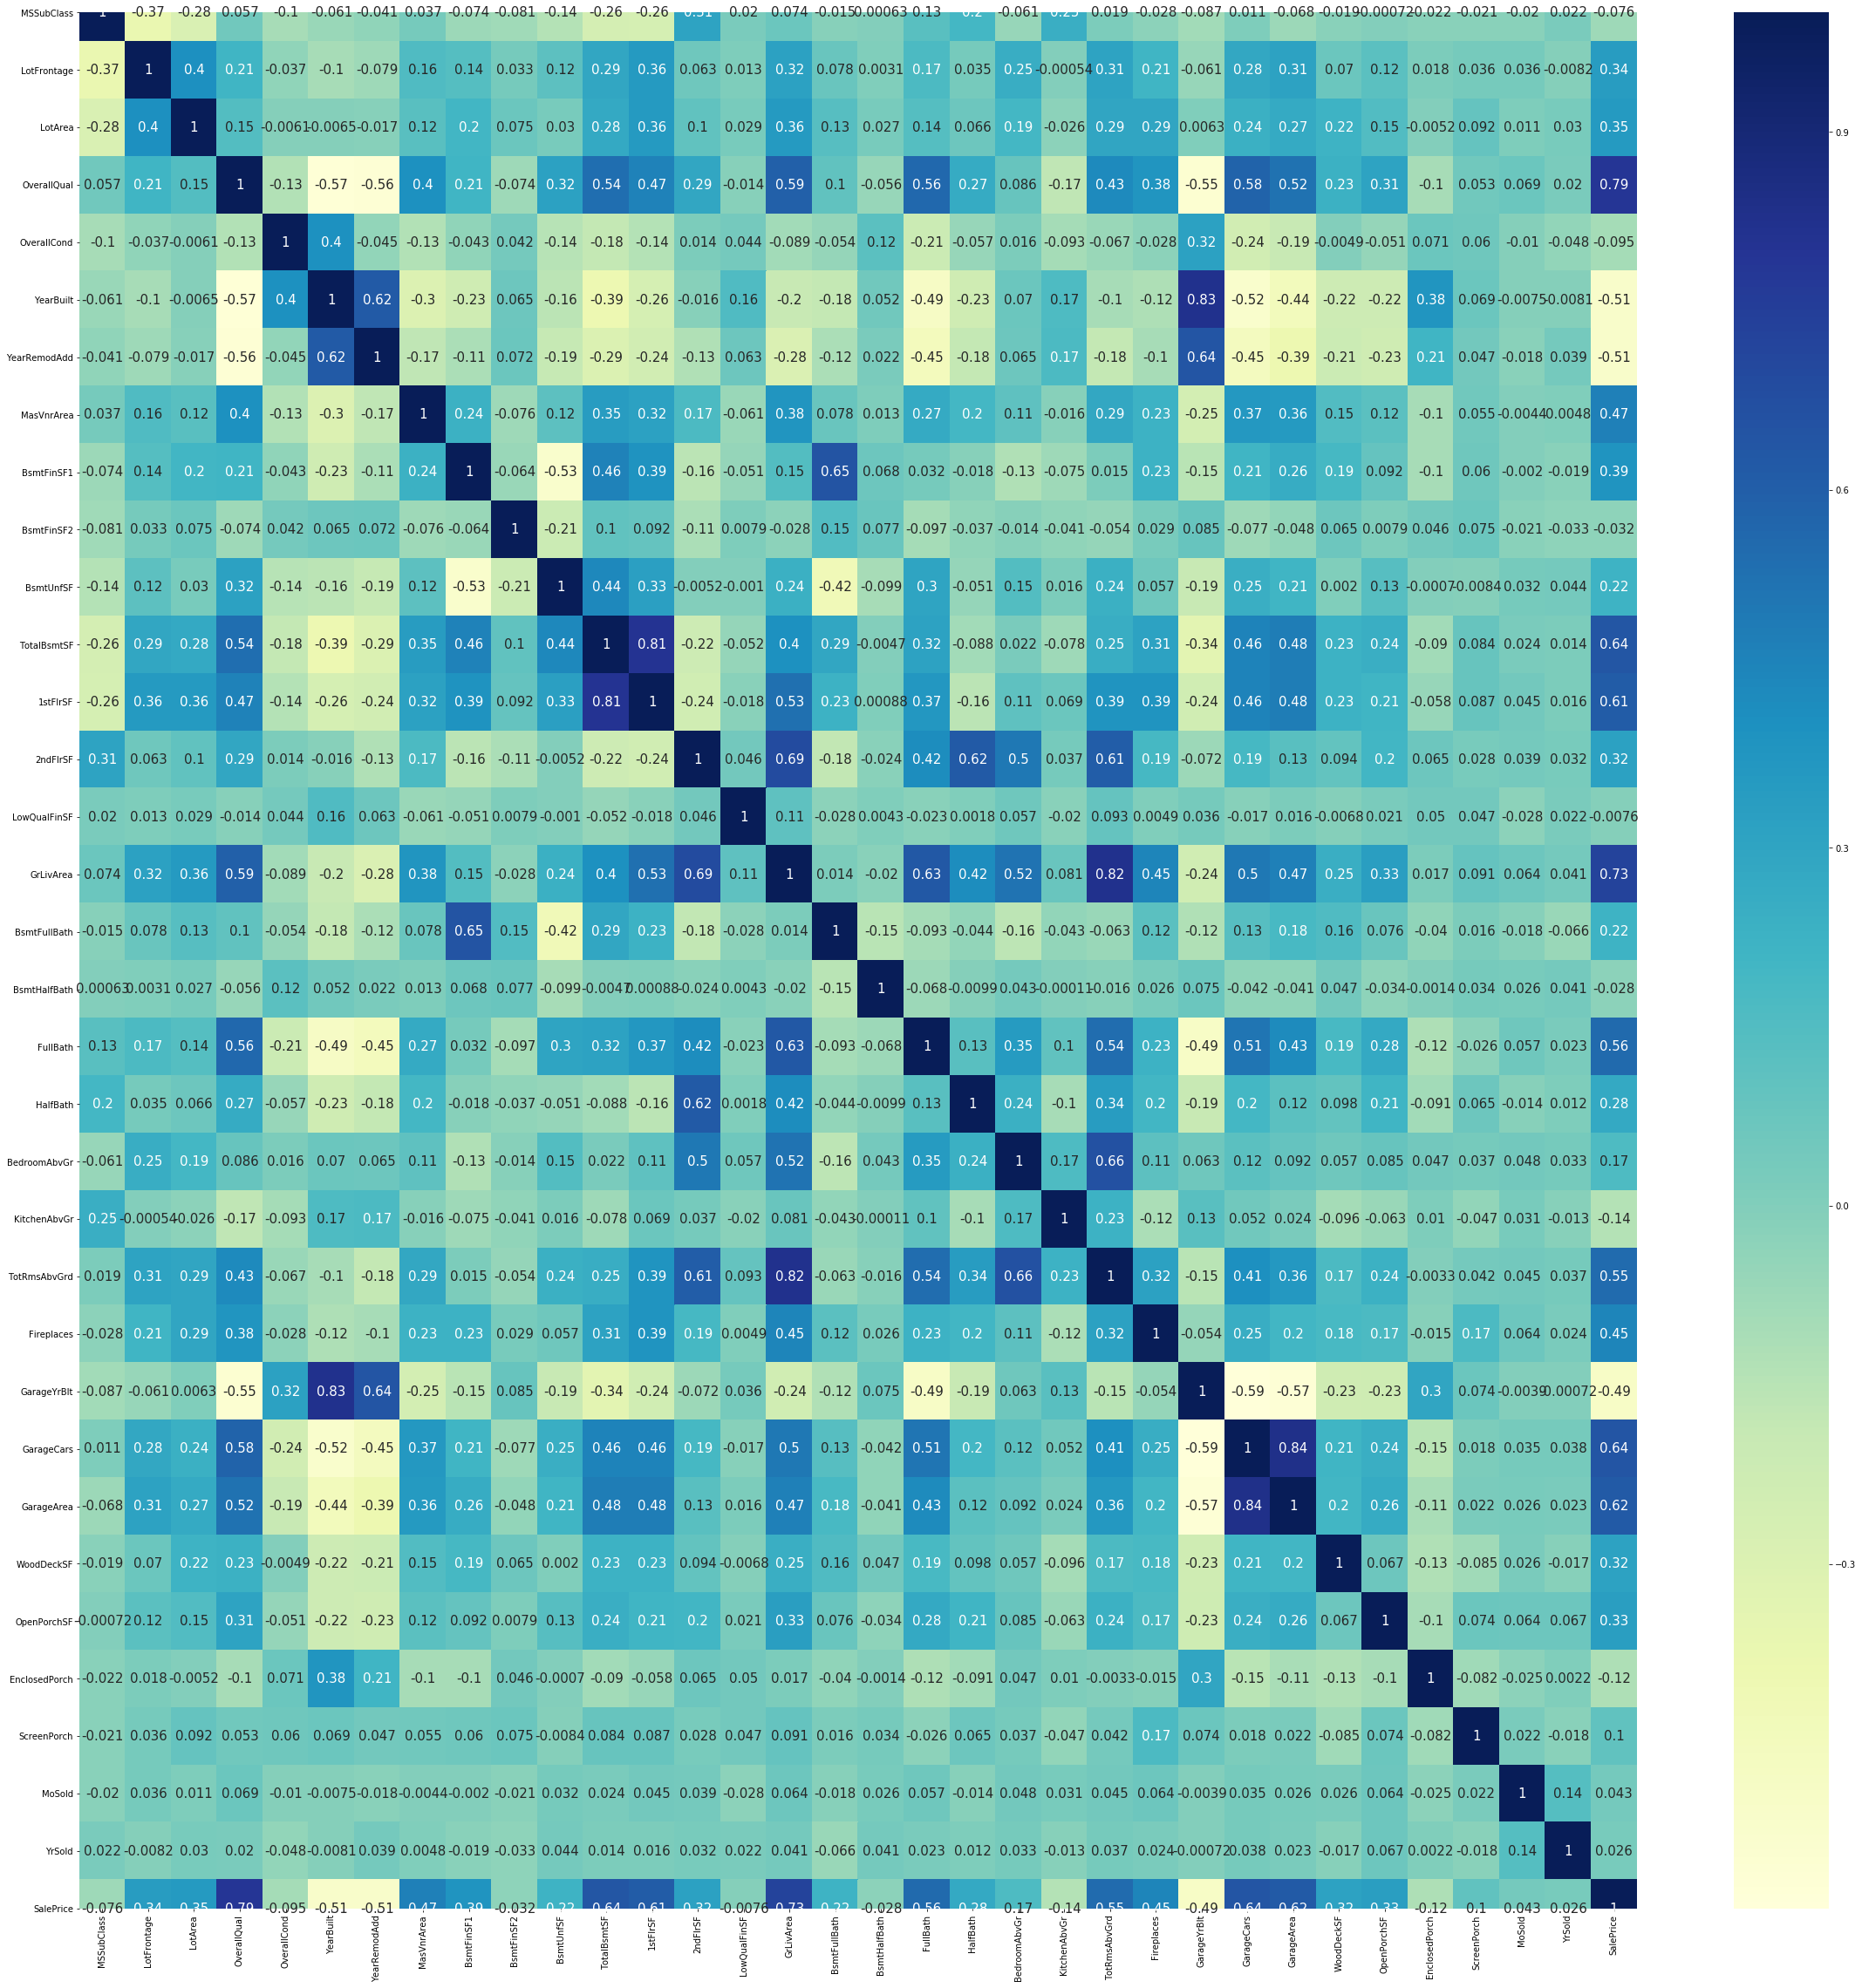

In [36]:
#heat map of the numeric variables to see the correaltion between the variables
plt.figure(figsize=(40,40))
correlation_matrix=housing.corr()
sns.heatmap(correlation_matrix,cmap="YlGnBu",annot=True,annot_kws={"size": 15})
plt.show()
#from the above heat map we see that variables such as OverallQual, YearBuilt, YearRemouldAdd, MasVnrArea, TotalBsmSF,
#1stFloorSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea are highly correlated to SalePrice

In [37]:
#encoding few of the categorical variables
housing['Street'] = housing['Street'].map({"Pave": 1,"Grvl": 0})
housing['CentralAir'] = housing['CentralAir'].map({"Y": 1, "N": 0})
housing['PavedDrive'] = housing['PavedDrive'].map({"Y": 2,"P": 1, "N": 0})
housing['LotShape'] = housing['LotShape'].map({"Reg": 0,"IR1": 1,"IR2": 2,"IR3": 3})
housing['LandSlope'] = housing['LandSlope'].map({"Gtl": 2,"Mod": 1,"Sev": 0})
housing['Functional'] = housing['Functional'].map({"Typ": 0,"Min1": 1,"Min2": 2,"Mod": 3,"Maj1": 4,"Maj2": 5,"Sev": 6,"Sal": 7})
housing['Fence'] = housing['Fence'].map({"GdPrv": 4,"MnPrv": 3,"GdWo": 2,"MnWw": 1,"no_fence": 0})
housing['ExterQual'] = housing['ExterQual'].map({"Ex": 4,"Gd": 3,"TA": 2,"Fa": 1,"Po": 0})
housing['ExterCond'] = housing['ExterCond'].map({"Ex": 4,"Gd": 3,"TA": 2,"Fa": 1,"Po": 0})
housing['GarageFinish'] = housing['GarageFinish'].map({"Fin": 3,"RFn": 2,"Unf": 1,"no_garage": 0})
housing['GarageQual'] = housing['GarageQual'].map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1,'no_garage':0})
housing['GarageCond'] = housing['GarageCond'].map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1,'no_garage':0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({"Gd": 4,"Av": 3,"Mn": 2,"No": 1,"no_basement": 0})
housing['BsmtQual'] = housing['BsmtQual'].map({"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"no_basement": 0})
housing['BsmtCond'] = housing['BsmtCond'].map({"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"no_basement": 0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({"GLQ":6,"ALQ":5,"BLQ":4,'Rec':3,'LwQ':2,'Unf':1,'no_basement':0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({"GLQ":6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'no_basement':0})
numeric.extend(['Street','CentralAir','PavedDrive','LotShape','LandSlope','Functional','Fence','ExterQual','ExterCond','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2'])


In [38]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,1,no_alley_access,0,Lvl,Inside,2,...,0,0,no_pool,0,none,2,12,WD,Normal,208500
1,20,RL,80.0,9600,1,no_alley_access,0,Lvl,FR2,2,...,0,0,no_pool,0,none,5,13,WD,Normal,181500
2,60,RL,68.0,11250,1,no_alley_access,1,Lvl,Inside,2,...,0,0,no_pool,0,none,9,12,WD,Normal,223500
3,70,RL,60.0,9550,1,no_alley_access,1,Lvl,Corner,2,...,272,0,no_pool,0,none,2,14,WD,Abnorml,140000
4,60,RL,84.0,14260,1,no_alley_access,1,Lvl,FR2,2,...,0,0,no_pool,0,none,12,12,WD,Normal,250000


In [39]:
#creating dummy variables for teh remaining categorical variables

housing = pd.get_dummies(housing, drop_first = True)
housing.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,2,7,5,17,17,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,0,2,6,8,44,44,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,1,2,7,5,19,18,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,1,2,7,5,105,50,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,1,2,8,5,20,20,...,0,0,0,0,1,0,0,0,1,0


In [40]:
import sklearn
from sklearn.model_selection import train_test_split

In [41]:
#splitting training and test data set
housing_train, housing_test = train_test_split(housing, train_size=0.7, random_state=100)
print(housing_train.shape)
print(housing_test.shape)

(949, 204)
(408, 204)


In [42]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
#scaling the numeric values using Standard scaler method
housing_train[numeric] = scaler.fit_transform(housing_train[numeric])
housing_train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
28,-0.886676,-1.108645,1.178782,0.056314,1.049589,0.22849,-0.881623,0.381506,0.522825,-0.586331,...,0,0,0,0,1,0,0,0,1,0
352,-0.134481,-0.500984,-0.182172,0.056314,-0.710234,0.22849,-0.881623,0.381506,1.064669,1.717212,...,0,1,0,0,0,0,0,0,1,0
586,-0.635945,-0.734700,0.040297,0.056314,-0.710234,0.22849,-0.126515,1.312223,1.843571,-0.733366,...,0,0,0,0,1,0,0,0,1,0
946,0.617714,-0.033552,-0.355371,0.056314,-0.710234,0.22849,-0.881623,0.381506,0.455094,1.276108,...,0,0,0,0,1,0,0,0,1,0
1273,0.617714,2.490578,0.274425,0.056314,1.049589,0.22849,-0.126515,1.312223,0.455094,-1.027435,...,0,0,0,0,1,0,0,0,1,0


In [44]:
#scaling the numeric values 
housing_test[numeric] = scaler.transform(housing_test[numeric])
housing_test.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1432,-0.635945,-0.500984,0.140530,0.056314,-0.710234,0.22849,-1.636732,0.381506,1.538784,-1.076447,...,0,0,0,0,1,0,0,0,1,0
390,-0.134481,-0.968415,-0.309862,0.056314,-0.710234,0.22849,-0.881623,2.242940,2.453147,1.717212,...,0,0,0,0,1,0,0,0,1,0
1404,-0.134481,-0.500984,0.067189,0.056314,-0.710234,0.22849,-2.391840,-1.479928,1.945167,1.717212,...,0,0,0,0,1,0,0,1,0,0
947,-0.886676,0.667595,0.843104,0.056314,-0.710234,0.22849,1.383703,-0.549211,-1.001114,-0.880400,...,0,0,0,0,1,0,0,0,1,0
724,-0.886676,0.714338,0.608035,0.056314,1.049589,0.22849,2.138811,-0.549211,-1.170441,-1.125458,...,0,0,0,0,1,0,0,0,1,0


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error 

In [46]:
#creating X_train and y_train
y_train = housing_train.pop('SalePrice')
X_train = housing_train
#creating X_test and y_test
y_test = housing_test.pop('SalePrice')
X_test = housing_test


In [47]:
#Using RFE to reduce the number of variables from 204 to 50
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)
 

In [48]:
#the 50 variables as suggested through RFE
selected_vars = X_train.columns[rfe.support_]
selected_vars

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'LotConfig_FR3',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'RoofMatl_WdShake',
       'Exterior1st_BrkFace', 'Exterior2nd_ImStucc', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Basment', 'GarageType_CarPort',
       'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_no_pool', 'MiscFeature_Shed',
       'MiscFeature_none', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Parti

In [49]:
X_train_reg = X_train[selected_vars]
X_test_reg = X_test[selected_vars]

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [94]:
# Ridge rigression 

# list of alphas to tune
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]}
ridge = Ridge()
# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_reg, y_train)
model_cv.best_estimator_ #gives us the optimal value of alpha for the ridge regression

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.9s finished


Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002672,0.000817,0.000939,0.000146,0.1,{'alpha': 0.1},-0.237002,-0.220709,-0.257062,-0.229485,...,-0.219183,-0.220595,-0.222189,-0.221988,-0.221160,-0.218530,-0.215192,-0.218315,-0.220101,0.002185
1,0.002303,0.000442,0.000883,0.000206,0.5,{'alpha': 0.5},-0.238868,-0.218280,-0.243957,-0.227914,...,-0.221966,-0.222094,-0.223512,-0.222906,-0.223117,-0.219608,-0.218772,-0.220257,-0.221863,0.001694
2,0.001935,0.000164,0.000790,0.000068,1,{'alpha': 1.0},-0.239090,-0.216589,-0.235887,-0.226506,...,-0.223451,-0.222636,-0.224024,-0.223501,-0.224129,-0.219893,-0.220351,-0.221411,-0.222696,0.001587
3,0.001871,0.000146,0.000741,0.000038,5,{'alpha': 5.0},-0.239719,-0.212900,-0.220588,-0.226701,...,-0.226489,-0.224342,-0.224647,-0.224973,-0.226722,-0.220559,-0.223090,-0.224739,-0.224618,0.001755
4,0.001779,0.000089,0.000709,0.000021,20,{'alpha': 20},-0.248155,-0.216082,-0.220343,-0.233131,...,-0.232911,-0.230525,-0.230001,-0.230526,-0.234232,-0.226658,-0.229502,-0.231216,-0.230804,0.002016


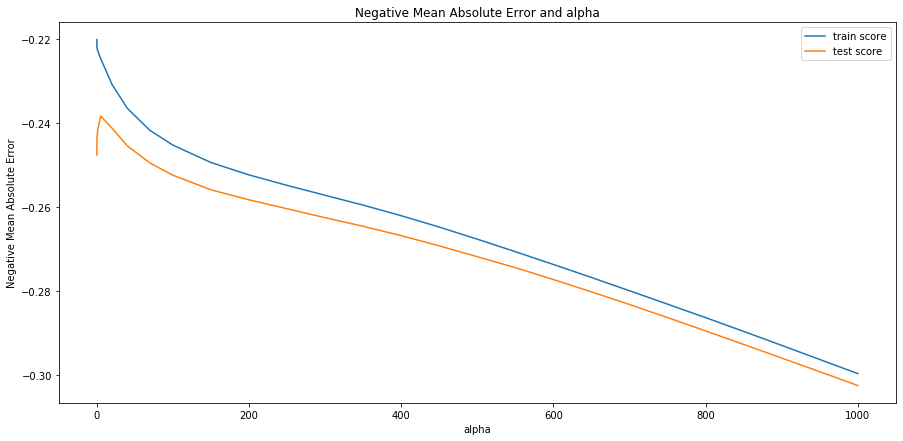

In [96]:
# plotting the Negative Mean Absolute Error and train scores, test scores differnet alpha values
plt.figure(figsize=(15,7))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
#optimal value of alpha for ridge is 5 

In [116]:
# Ridge model is with alpha = 5
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_reg, y_train)
ridge.coef_

array([-1.04374877e-01,  2.47221911e-01,  9.27526712e-02, -1.57663167e-01,
        1.05382570e-01, -6.89985082e-04, -3.16783876e-02,  7.55703387e-02,
        1.31105822e-01,  1.52281708e-01,  2.54275990e-03,  2.29427207e-01,
        1.12918394e-01,  0.00000000e+00, -1.13281636e-01, -1.43664752e-01,
        2.92621976e-01,  4.64499423e-01,  1.72007618e-01,  3.23398788e-01,
       -1.64188234e-01, -1.00529073e-02,  3.15376033e-01, -6.93125296e-01,
        3.18433033e-02, -1.61299864e-01,  5.78642052e-02,  3.91718123e-02,
       -7.24746648e-02,  2.13108965e-01,  1.77516937e-01, -8.58933569e-02,
        1.79152124e-01,  1.15785521e-02, -2.84295711e-01, -3.52514075e-01,
       -3.52425178e-01, -8.07794776e-02,  4.49513092e-03, -2.33846133e-02,
        3.36923317e-03, -3.11078903e-01, -3.22181864e-02,  3.41128588e-03,
        1.54006294e-01,  7.18943470e-02,  2.15924988e-01,  8.71336302e-02,
        3.27689823e-02, -1.02296062e-02])

In [117]:
y_train_pred = ridge.predict(X_train_reg)
print('r2_score of training set :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test_reg)
print('r2_score of test set :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('mse of training set :',mean_squared_error(y_train,y_train_pred))
print('mse of test set :',mean_squared_error(y_test,y_test_pred))

r2_score of training set : 0.8800724927453663
r2_score of test set : 0.8527828240926411
mse of training set : 0.11992750725463372
mse of test set : 0.21899509319404678


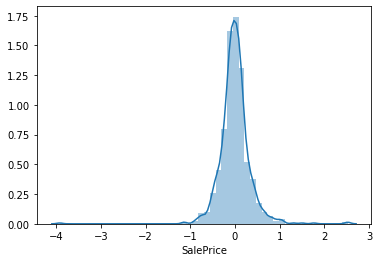

In [118]:
#calculating residuals for training set
res = y_train - y_train_pred
sns.distplot(res)
#we see that the resdiuals follow a normal distribution 

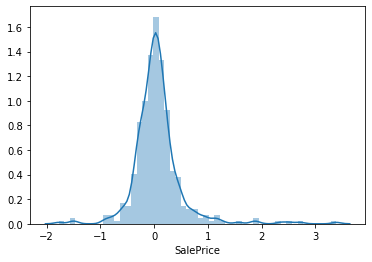

In [119]:
#calculating residuals for test set
res = y_test - y_test_pred
sns.distplot(res)
#we see that the resdiuals follow a normal distribution 

In [120]:
# the most significant variables in predicting the price of a house using ridge regression
coefficients = pd.Series(ridge.coef_,index=X_train_reg.columns).sort_values()
most_significant_coeffs = pd.concat([coefficients.sort_values().head(7),coefficients.sort_values().tail(7)])
print((most_significant_coeffs))

Condition2_PosN        -0.693125
KitchenQual_Gd         -0.352514
KitchenQual_TA         -0.352425
PoolQC_no_pool         -0.311079
KitchenQual_Fa         -0.284296
Condition1_RRAe        -0.164188
BldgType_Duplex        -0.161300
SaleType_New            0.215925
GrLivArea               0.229427
OverallQual             0.247222
Neighborhood_NoRidge    0.292622
Condition2_Norm         0.315376
Neighborhood_StoneBr    0.323399
Neighborhood_NridgHt    0.464499
dtype: float64


In [158]:
# Lasso regression

lasso = Lasso()
folds = 10
params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008,0.01,0.05]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_reg, y_train)
model_cv.best_estimator_ #gives us the optimal value of alpha for the lasso regression

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021403,0.006246,0.001151,0.000141,0.0001,{'alpha': 0.0001},-0.237592,-0.220369,-0.261318,-0.229207,...,-0.219045,-0.220922,-0.222350,-0.222165,-0.221462,-0.218718,-0.214612,-0.218697,-0.220236,0.002375
1,0.013388,0.001054,0.001073,0.000103,0.001,{'alpha': 0.001},-0.236330,-0.213935,-0.251548,-0.226007,...,-0.222780,-0.224075,-0.224155,-0.225071,-0.226342,-0.220632,-0.222535,-0.223740,-0.223915,0.001601
2,0.006933,0.000598,0.000887,0.000053,0.002,{'alpha': 0.002},-0.238425,-0.213537,-0.241979,-0.228078,...,-0.225545,-0.226345,-0.225853,-0.227096,-0.228774,-0.221773,-0.224594,-0.226609,-0.225980,0.001798
3,0.005139,0.000331,0.000848,0.000042,0.003,{'alpha': 0.003},-0.241706,-0.214667,-0.232970,-0.231786,...,-0.229457,-0.229513,-0.228241,-0.229774,-0.232090,-0.224686,-0.227197,-0.229489,-0.228920,0.001885
4,0.004201,0.000295,0.000911,0.000126,0.005,{'alpha': 0.005},-0.249738,-0.218942,-0.219698,-0.241430,...,-0.238153,-0.236176,-0.234502,-0.235213,-0.240577,-0.231879,-0.234781,-0.237715,-0.236311,0.002297


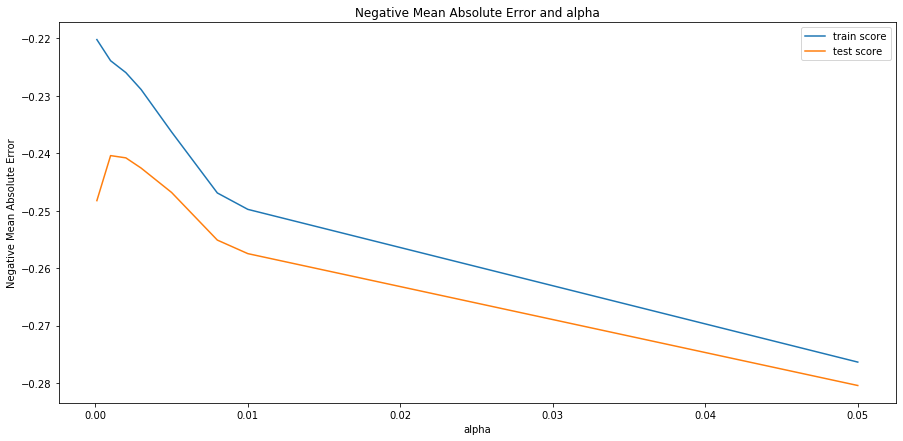

In [160]:
# plotting the Negative Mean Absolute Error and train scores, test scores differnet alpha values
plt.figure(figsize=(15,7))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [161]:
#optimal value of alpha for lasso is 0.001

In [162]:
# Lasso model
alpha =0.001
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train_reg, y_train)
lasso.coef_

array([-1.07534248e-01,  2.37867729e-01,  9.16009385e-02, -1.59091975e-01,
        1.41065630e-01,  8.34705451e-03, -0.00000000e+00,  5.07820638e-02,
        1.36733645e-03,  0.00000000e+00, -9.68121926e-03,  4.10228382e-01,
        1.09062620e-01,  0.00000000e+00, -1.07185457e-01, -1.36967511e-01,
        3.12402129e-01,  4.96481739e-01,  1.75644667e-01,  3.54323373e-01,
       -1.27084408e-01, -0.00000000e+00,  0.00000000e+00, -2.37054364e+00,
       -0.00000000e+00, -1.45597532e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.19592421e-01,  1.44973395e-01, -0.00000000e+00,
        1.59058579e-01,  0.00000000e+00, -3.78180284e-01, -4.14973709e-01,
       -4.18010857e-01, -2.56676865e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.37458413e-01, -0.00000000e+00,  0.00000000e+00,
        7.23214818e-02,  0.00000000e+00,  2.26435206e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [163]:
y_train_pred = lasso.predict(X_train_reg)
print('r2_score of training set :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test_reg)
print('r2_score of test set :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('mse of training set :',mean_squared_error(y_train,y_train_pred))
print('mse of test set :',mean_squared_error(y_test,y_test_pred))

r2_score of training set : 0.8874117335661625
r2_score of test set : 0.8574136315670747
mse of training set : 0.11258826643383749
mse of test set : 0.21210646686239193


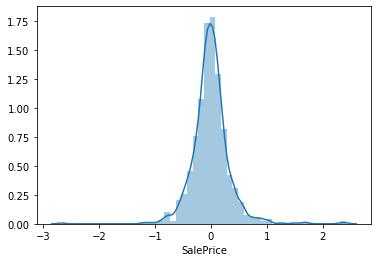

In [164]:
#calculating residuals for training set
res = y_train - y_train_pred
sns.distplot(res)
#we see that the resdiuals follow a normal distribution 

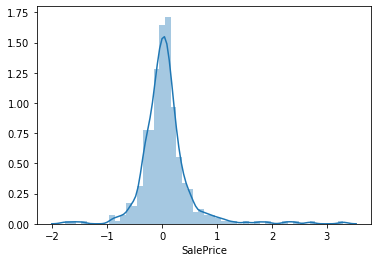

In [165]:
#calculating residuals for test set
res = y_test - y_test_pred
sns.distplot(res)
#we see that the resdiuals follow a normal distribution 

In [166]:
# now as the final model for the hosuing problem given, final lasso model would be better than final ridge model
# as for almost same level of accuarcy, because lasso makes some of the coefficients to be zero and therefore easier
#to eliminate some of the input variable as not contributing to the output, thus also providing feature selection  


In [167]:
#the final set of coefficients 
lasso.coef_

array([-1.07534248e-01,  2.37867729e-01,  9.16009385e-02, -1.59091975e-01,
        1.41065630e-01,  8.34705451e-03, -0.00000000e+00,  5.07820638e-02,
        1.36733645e-03,  0.00000000e+00, -9.68121926e-03,  4.10228382e-01,
        1.09062620e-01,  0.00000000e+00, -1.07185457e-01, -1.36967511e-01,
        3.12402129e-01,  4.96481739e-01,  1.75644667e-01,  3.54323373e-01,
       -1.27084408e-01, -0.00000000e+00,  0.00000000e+00, -2.37054364e+00,
       -0.00000000e+00, -1.45597532e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.19592421e-01,  1.44973395e-01, -0.00000000e+00,
        1.59058579e-01,  0.00000000e+00, -3.78180284e-01, -4.14973709e-01,
       -4.18010857e-01, -2.56676865e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.37458413e-01, -0.00000000e+00,  0.00000000e+00,
        7.23214818e-02,  0.00000000e+00,  2.26435206e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [168]:
# the most significant variables in predicting the price of a house
coefficients = pd.Series(lasso.coef_,index=X_train_reg.columns).sort_values()
most_significant_coeffs = pd.concat([coefficients.sort_values().head(7),coefficients.sort_values().tail(7)])
print((most_significant_coeffs))

Condition2_PosN        -2.370544
PoolQC_no_pool         -0.437458
KitchenQual_TA         -0.418011
KitchenQual_Gd         -0.414974
KitchenQual_Fa         -0.378180
YearBuilt              -0.159092
BldgType_Duplex        -0.145598
Exterior1st_BrkFace     0.219592
SaleType_New            0.226435
OverallQual             0.237868
Neighborhood_NoRidge    0.312402
Neighborhood_StoneBr    0.354323
GrLivArea               0.410228
Neighborhood_NridgHt    0.496482
dtype: float64


In [169]:
#the features postively affecting the price(ie, which increase the price) are 
#Neighborhood_NridgHt
#GrLivArea
#Neighborhood_StoneBr
#Neighborhood_NoRidge
#OverallQual 
#SaleType_New
#Exterior1st_BrkFace

In [170]:
#the features negatively affecting the price(ie, which decrease the price) are
#Condition2_PosN
#PoolQC_no_pool
#KitchenQual_TA
#KitchenQual_Gd
#KitchenQual_Fa
#YearBuilt 
#BldgType_Duplex